Annotated Corpus for Named Entity Recognition

In [1]:
#Imports
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sn #biblioteca utilizada para os plots mais bonitos


%matplotlib inline
plt.style.use('ggplot')

In [2]:
ner = pd.read_csv('ner.csv', encoding='iso-8859-1', error_bad_lines=False)  #leitura do arquivo ner

b'Skipping line 281837: expected 25 fields, saw 34\n'


In [20]:
ner.head(10) #visualização de parte do início do arquivo

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
0,0,thousand,of,demonstr,NNS,lowercase,demonstrators,IN,lowercase,of,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,1.0,capitalized,Thousands,O
1,1,of,demonstr,have,VBP,lowercase,have,NNS,lowercase,demonstrators,...,__start1__,__START1__,wildcard,__START1__,capitalized,Thousands,1.0,lowercase,of,O
2,2,demonstr,have,march,VBN,lowercase,marched,VBP,lowercase,have,...,thousand,NNS,capitalized,Thousands,lowercase,of,1.0,lowercase,demonstrators,O
3,3,have,march,through,IN,lowercase,through,VBN,lowercase,marched,...,of,IN,lowercase,of,lowercase,demonstrators,1.0,lowercase,have,O
4,4,march,through,london,NNP,capitalized,London,IN,lowercase,through,...,demonstr,NNS,lowercase,demonstrators,lowercase,have,1.0,lowercase,marched,O
5,5,through,london,to,TO,lowercase,to,NNP,capitalized,London,...,have,VBP,lowercase,have,lowercase,marched,1.0,lowercase,through,O
6,6,london,to,protest,VB,lowercase,protest,TO,lowercase,to,...,march,VBN,lowercase,marched,lowercase,through,1.0,capitalized,London,B-geo
7,7,to,protest,the,DT,lowercase,the,VB,lowercase,protest,...,through,IN,lowercase,through,capitalized,London,1.0,lowercase,to,O
8,8,protest,the,war,NN,lowercase,war,DT,lowercase,the,...,london,NNP,capitalized,London,lowercase,to,1.0,lowercase,protest,O
9,9,the,war,in,IN,lowercase,in,NN,lowercase,war,...,to,TO,lowercase,to,lowercase,protest,1.0,lowercase,the,O


In [4]:
ner.info() #informação sobre o arquivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050795 entries, 0 to 1050794
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1050795 non-null  int64  
 1   lemma            1050795 non-null  object 
 2   next-lemma       1050795 non-null  object 
 3   next-next-lemma  1050795 non-null  object 
 4   next-next-pos    1050795 non-null  object 
 5   next-next-shape  1050795 non-null  object 
 6   next-next-word   1050795 non-null  object 
 7   next-pos         1050795 non-null  object 
 8   next-shape       1050794 non-null  object 
 9   next-word        1050794 non-null  object 
 10  pos              1050794 non-null  object 
 11  prev-iob         1050794 non-null  object 
 12  prev-lemma       1050794 non-null  object 
 13  prev-pos         1050794 non-null  object 
 14  prev-prev-iob    1050794 non-null  object 
 15  prev-prev-lemma  1050794 non-null  object 
 16  prev-prev-pos    1

É possível perceber que algumas colunas possuem menos dados que outras, o que pode indicar dados faltantes. Por enquanto, por se tratar de apenas um registro será ignorado.

In [5]:
#ner.dropna(inplace=True) #remover os dados faltantes de algumas colunas

In [167]:
ner.tag.unique() #os valores que podem aparecer na coluna tag, são devolvidos por ordem de aparecimento.

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat', nan], dtype=object)

Informações essenciais sobre as entidades:

geo = Geographical Entity
org = Organization
per = Person
gpe = Geopolitical Entity
tim = Time indicator
art = Artifact
eve = Event
nat = Natural Phenomenon

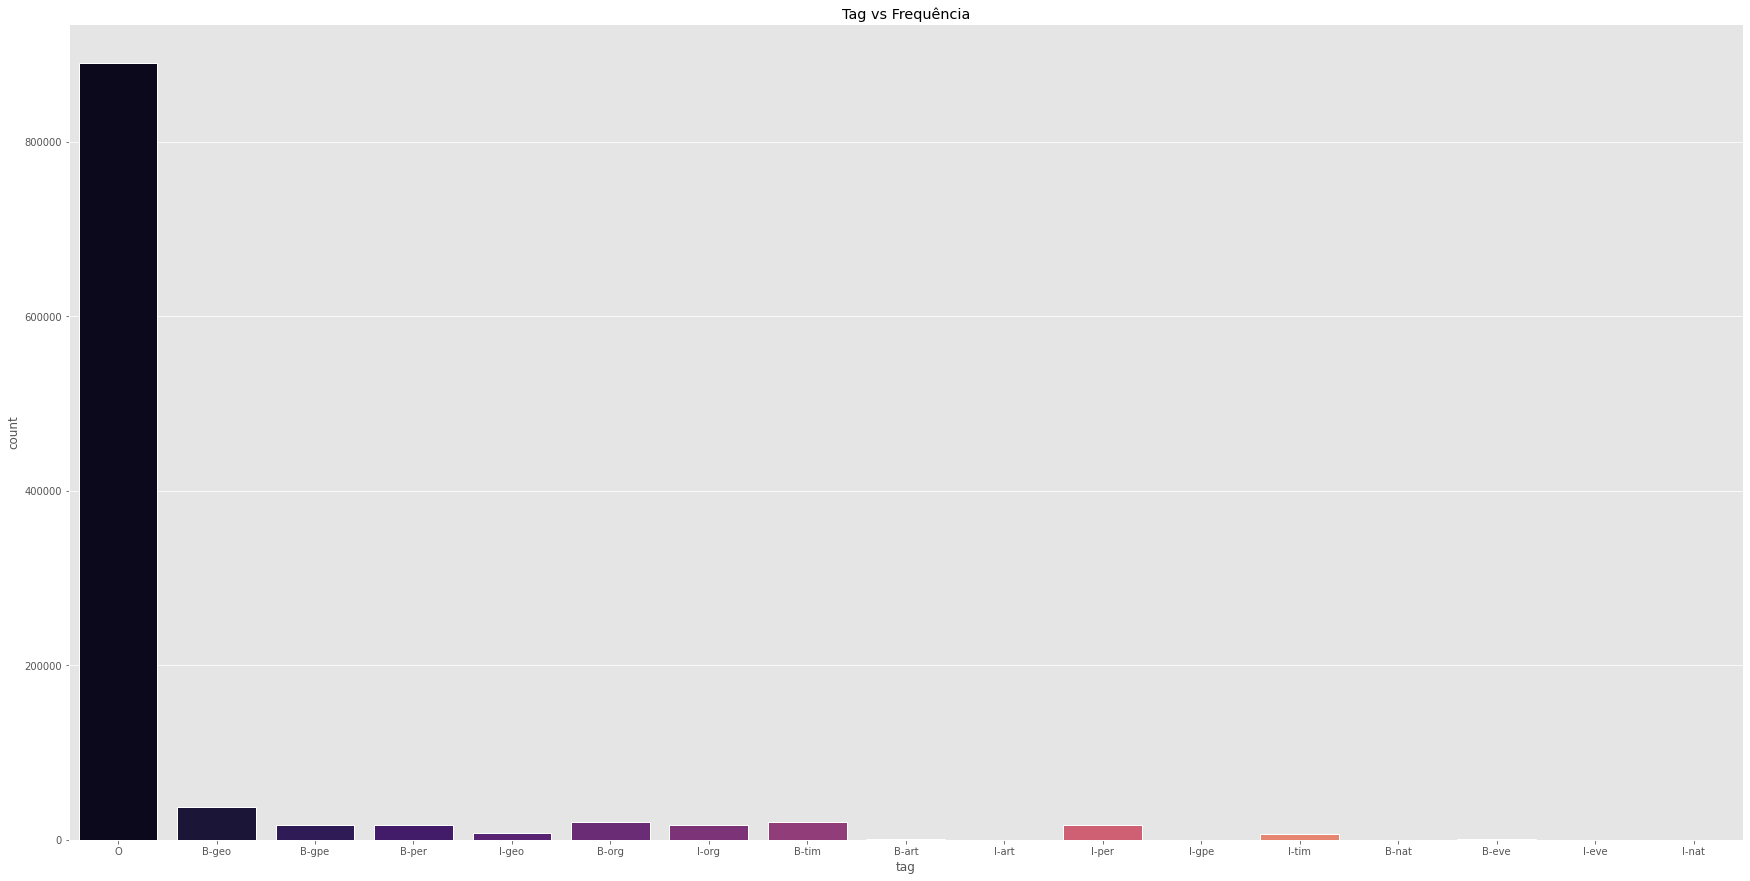

In [7]:
plt.figure(figsize=(30,15))
plt.title('Tag vs Frequência')
sn.set(font_scale=1.5)
sn.countplot(x='tag', data = ner, palette = 'magma');

In [8]:
filtro  = ner['tag'] != "O" 
data1 = ner[filtro]

data1

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
6,6,london,to,protest,VB,lowercase,protest,TO,lowercase,to,...,march,VBN,lowercase,marched,lowercase,through,1.0,capitalized,London,B-geo
12,12,iraq,and,demand,VB,lowercase,demand,CC,lowercase,and,...,war,NN,lowercase,war,lowercase,in,1.0,capitalized,Iraq,B-geo
18,18,british,troop,from,IN,lowercase,from,NNS,lowercase,troops,...,withdraw,NN,lowercase,withdrawal,lowercase,of,1.0,capitalized,British,B-gpe
42,42,bush,number,one,CD,capitalized,One,NN,capitalized,Number,...,as,IN,lowercase,as,punct,"""",2.0,capitalized,Bush,B-per
65,65,hyde,park,.,.,punct,.,NNP,capitalized,Park,...,ralli,NN,lowercase,rally,lowercase,in,3.0,capitalized,Hyde,B-geo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050728,1048508,pakistani,counterpart,of,IN,lowercase,of,NNS,lowercase,counterparts,...,accus,VBG,lowercase,accusing,lowercase,their,47955.0,capitalized,Pakistani,B-gpe
1050738,1048518,punjab,state,.,.,punct,.,NN,lowercase,state,...,into,IN,lowercase,into,lowercase,northern,47955.0,capitalized,Punjab,B-geo
1050741,1048521,indian,offici,said,VBD,lowercase,said,NNS,lowercase,officials,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,47956.0,capitalized,Indian,B-gpe
1050749,1048529,saturday,'s,incid,NN,lowercase,incident,POS,other,'s,...,injur,VBN,lowercase,injured,lowercase,in,47956.0,capitalized,Saturday,B-tim


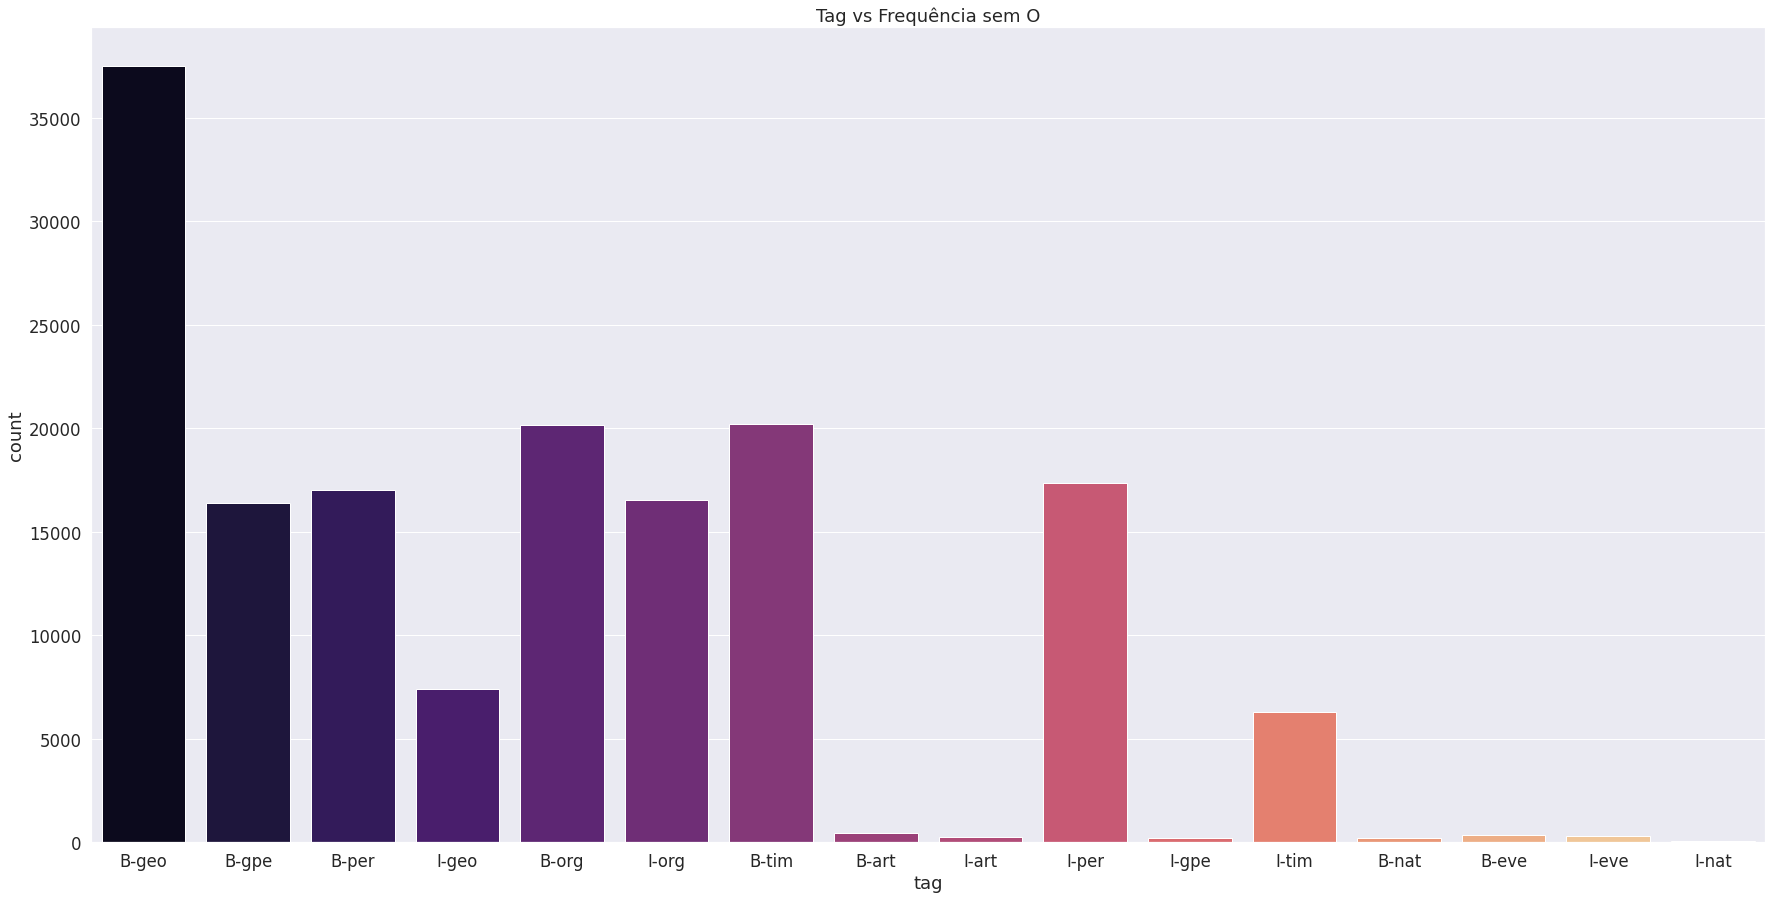

In [9]:
plt.figure(figsize=(30,15))
plt.title('Tag vs Frequência sem O')
sn.set(font_scale=3)
sn.countplot(x='tag', data = data1, palette = 'magma');

del data1

É possível observar que as classes estão desbalanceadas. Talvez seja interessante realizar um balanceamento para o treinamento. É possível observar também que a quantidade de tokens e palavras que não são entidades representa grande parte dos dados.

In [10]:
ner.pos.unique()

array(['NNS', 'IN', 'VBP', 'VBN', 'NNP', 'TO', 'VB', 'DT', 'NN', 'CC',
       'JJ', '.', 'VBD', 'WP', '``', 'CD', 'PRP', 'VBZ', 'POS', 'VBG',
       'RB', ',', 'WRB', 'PRP$', 'MD', 'WDT', 'JJR', ':', 'JJS', 'WP$',
       'RP', 'PDT', 'NNPS', 'EX', 'RBS', 'LRB', 'RRB', '$', 'RBR', ';',
       'UH', nan], dtype=object)

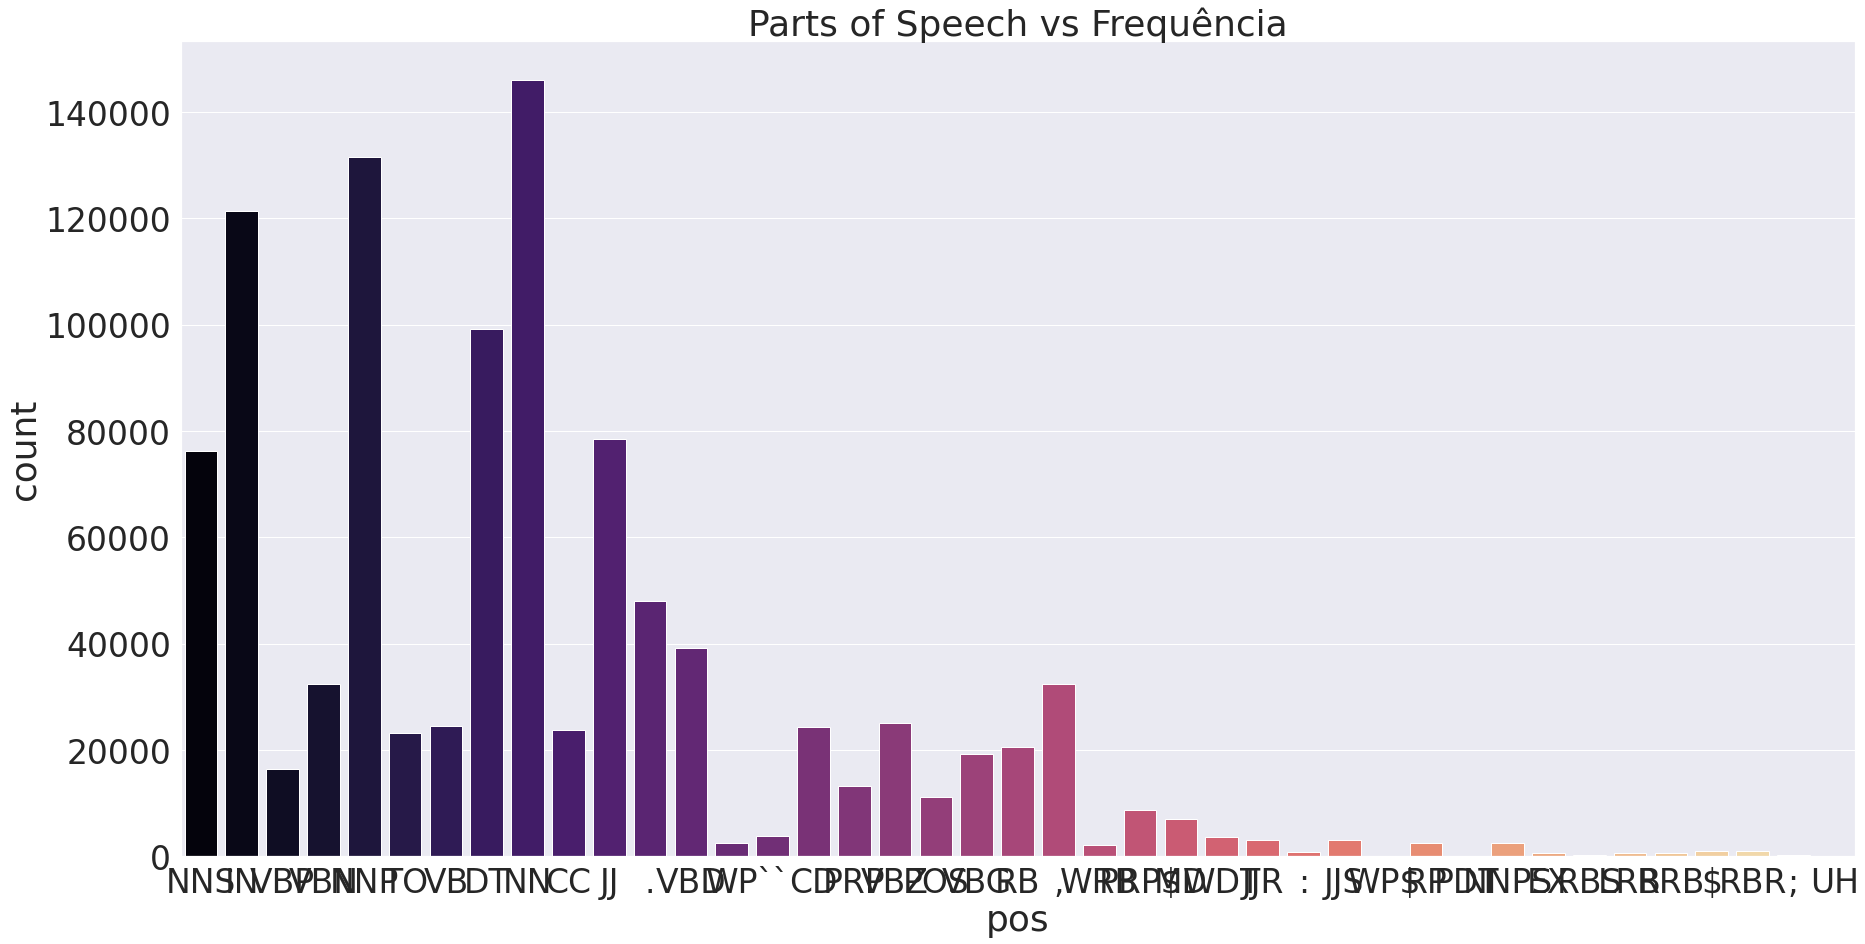

In [11]:
plt.figure(figsize=(30,15))
plt.title('Parts of Speech vs Frequência')
sn.set(font_scale=1.5)
sn.countplot(x='pos', data = ner, palette = 'magma');

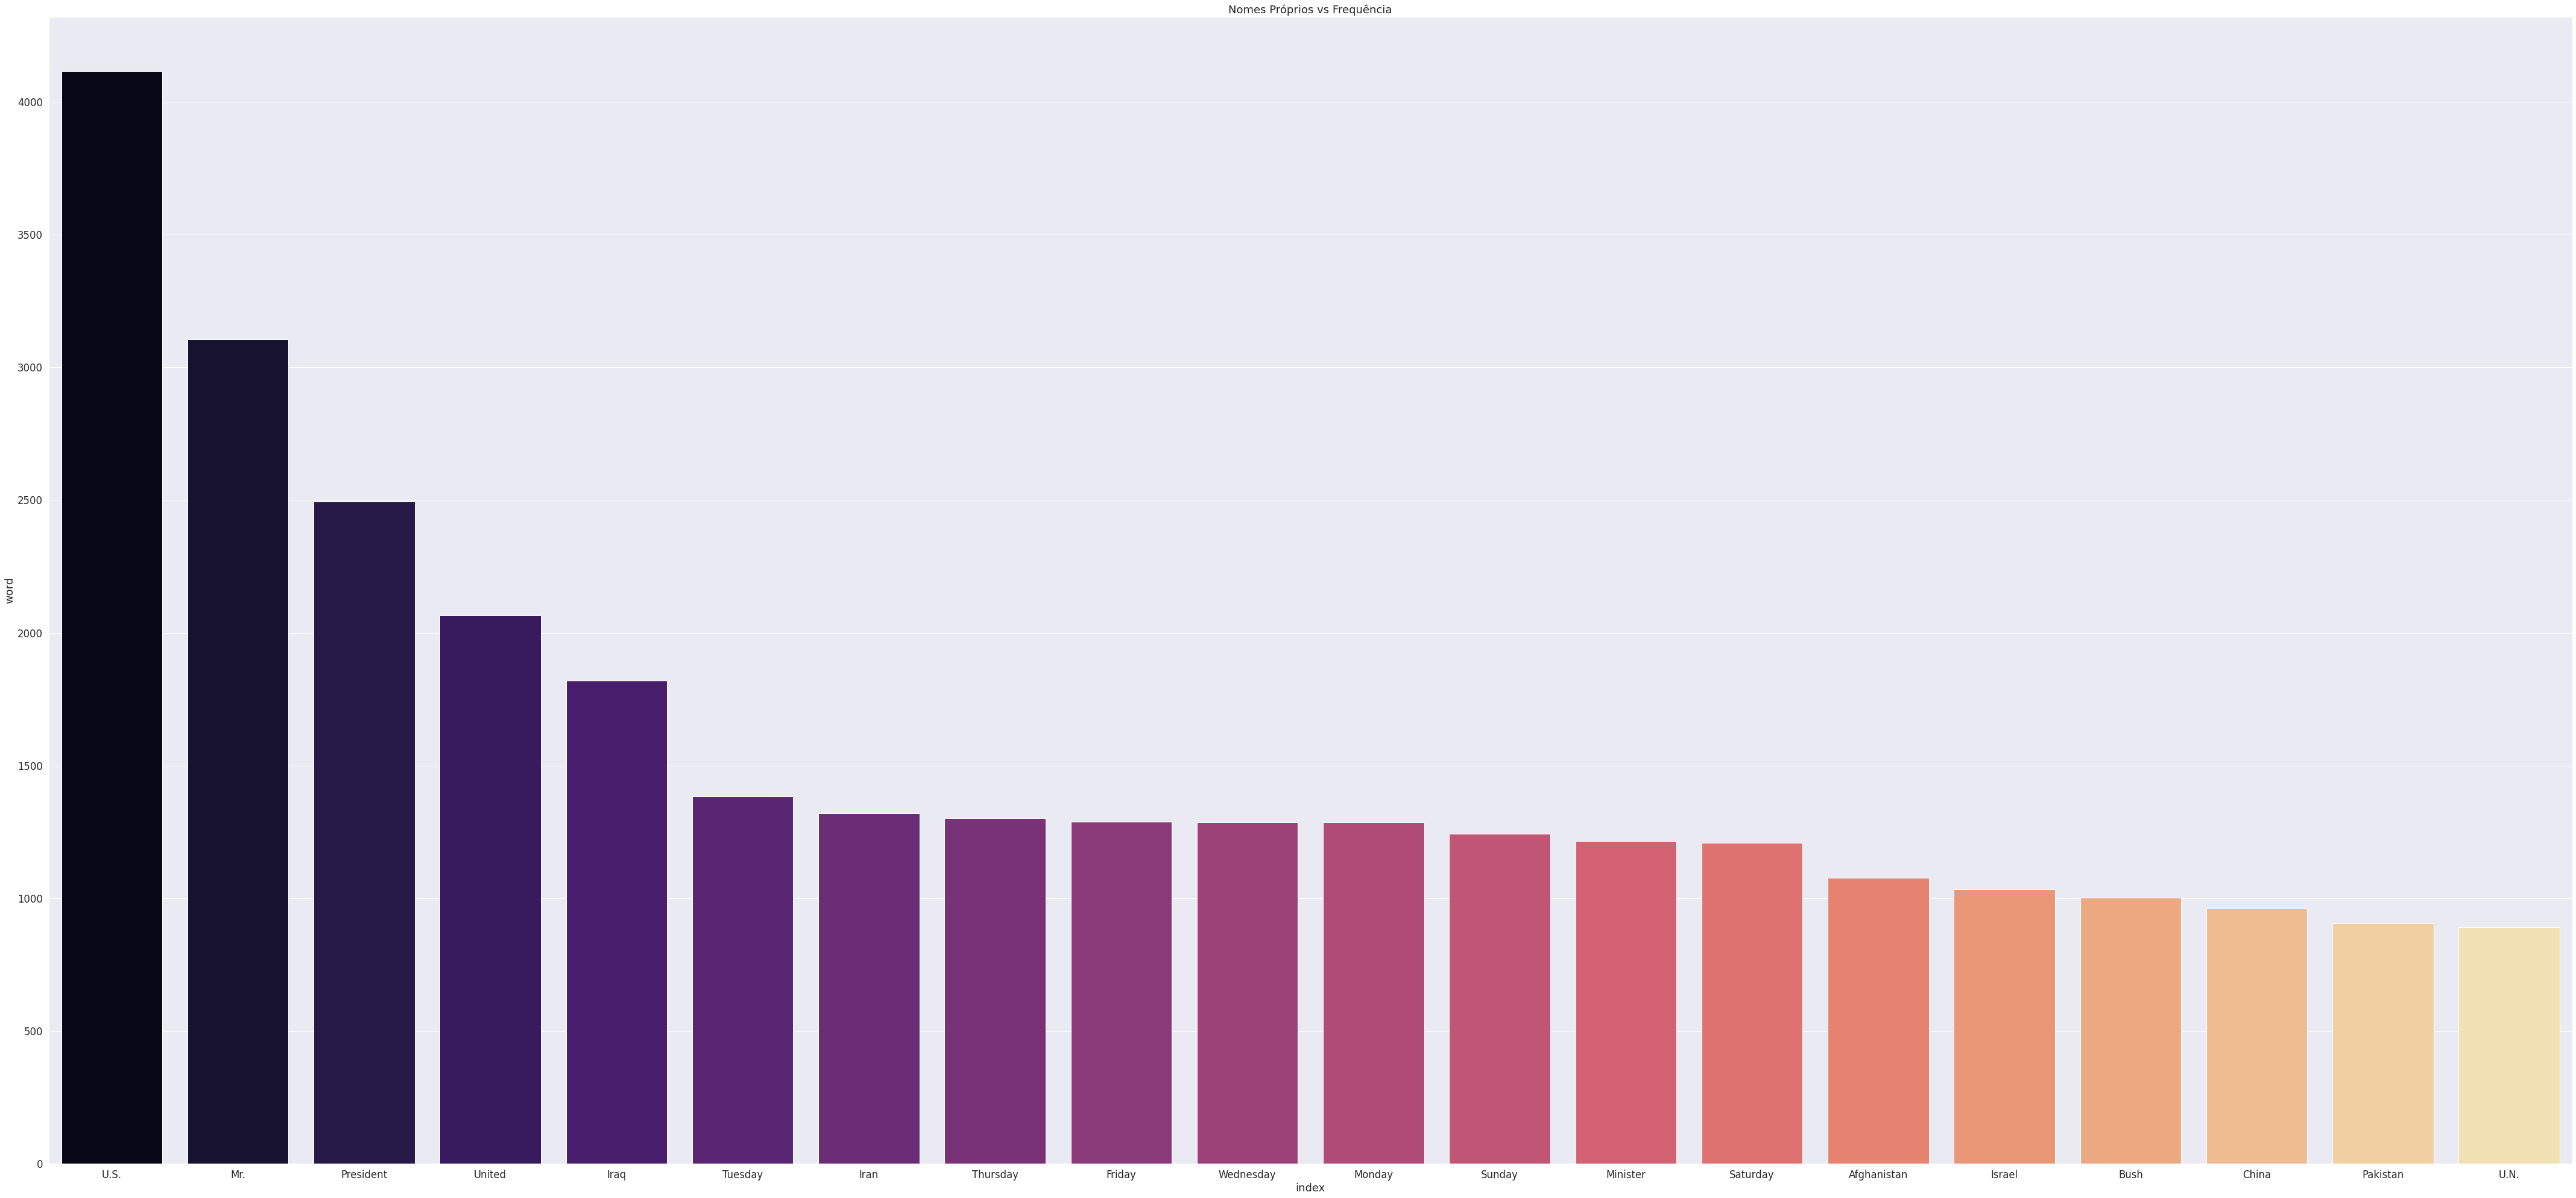

In [12]:
#os 20 nomes próprios (substantivos) mais comumente nomeados
data = ner.query('pos == "NNP"').word.value_counts().reset_index().head(20)

#nomes próprios (substantivos) plot
plt.figure(figsize=(75,35))
plt.title('Nomes Próprios vs Frequência')
sn.set(font_scale=3.5)
sn.barplot(x='index',y='word', data =data, palette = 'magma');

del data

É possível observar que muitos dos substantivos próprios mais nomeados são dias da semana. Além disso é possível observar que alguns desses substantivos próprios são extremamente genéricos como por ex.: Mr. e President. Portanto se a maior parte das classes forem oriundas desses substantivos próprios isso pode indicar que o que for classificado como NER pode trazer informações genéricas.

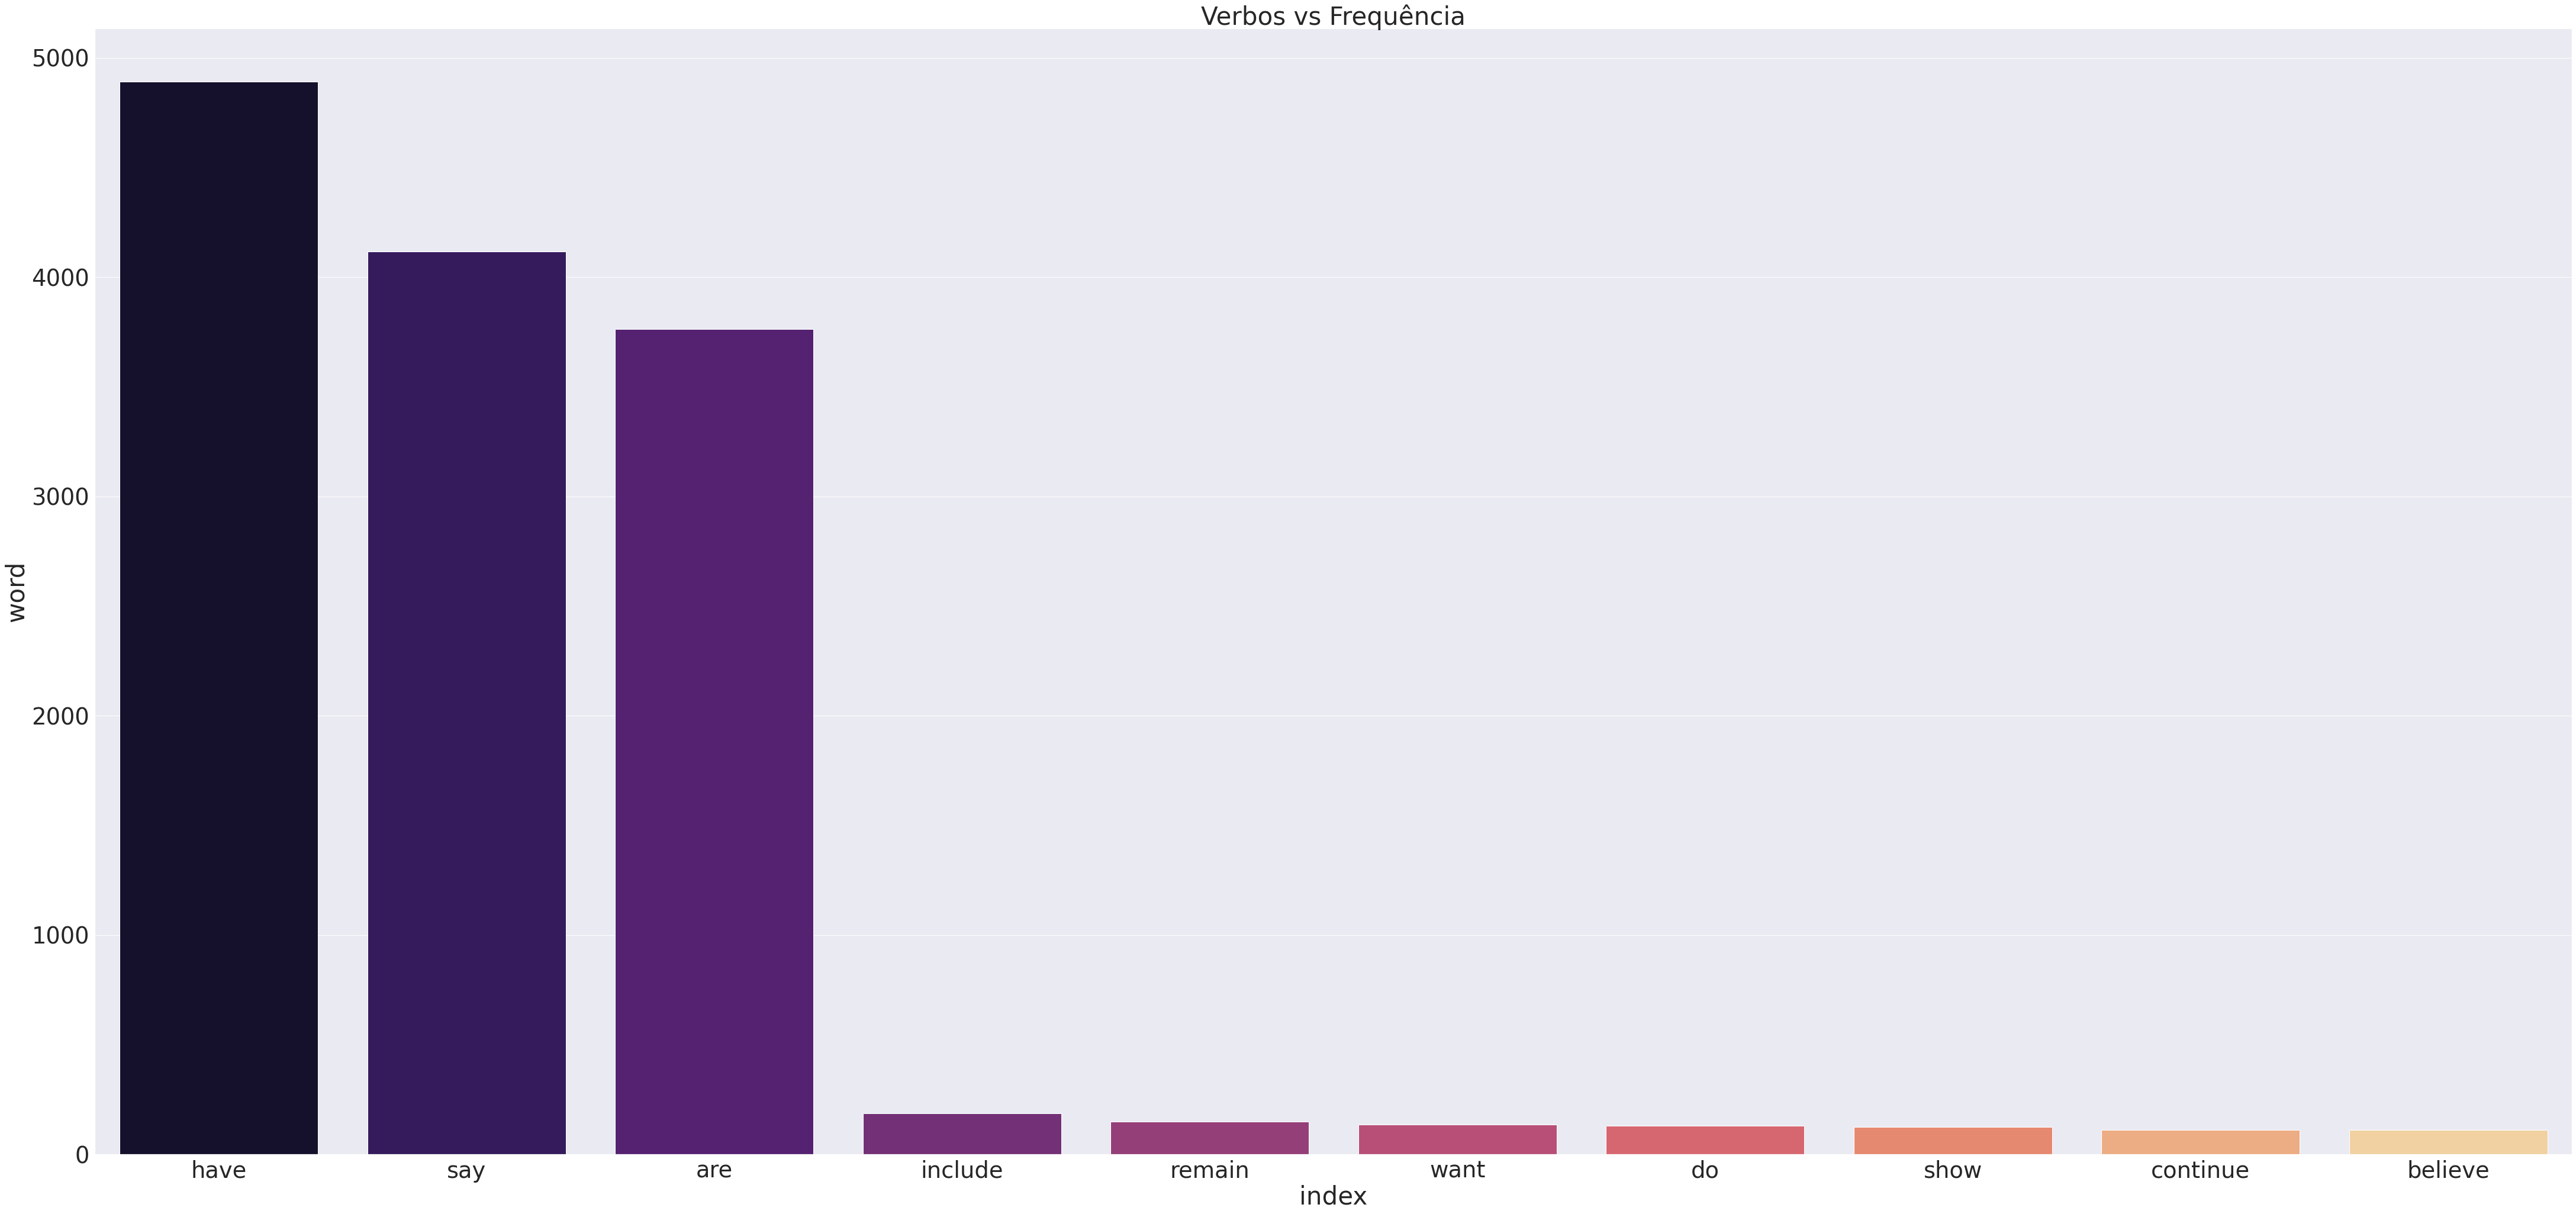

In [13]:
#os 10 verbos mais comumente nomeados
data2 = ner.query('pos == "VBP"').word.value_counts().reset_index().head(10)

#verbos plot
plt.figure(figsize=(75,35))
plt.title('Verbos vs Frequência')
sn.set(font_scale=3)
sn.barplot(x='index',y='word', data =data2, palette = 'magma');

del data2

In [14]:
len(ner['Unnamed: 0'].unique()) #Obter o número de linhas exclusivas para a coluna unnamed

768960

In [15]:
ner.tail(10) #visualização de parte do final do arquivo

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
1050785,1048565,impact,.,__end1__,__END1__,wildcard,__END1__,.,punct,.,...,explod,VBD,lowercase,exploded,lowercase,upon,47958.0,lowercase,impact,O
1050786,1048566,.,__end1__,__end2__,__END2__,wildcard,__END2__,__END1__,wildcard,__END1__,...,upon,IN,lowercase,upon,lowercase,impact,47958.0,punct,.,O
1050787,1048567,indian,forc,said,VBD,lowercase,said,NNS,lowercase,forces,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,47959.0,capitalized,Indian,B-gpe
1050788,1048568,forc,said,they,PRP,lowercase,they,VBD,lowercase,said,...,__start1__,__START1__,wildcard,__START1__,capitalized,Indian,47959.0,lowercase,forces,O
1050789,1048569,said,they,respond,VBD,lowercase,responded,PRP,lowercase,they,...,indian,JJ,capitalized,Indian,lowercase,forces,47959.0,lowercase,said,O
1050790,1048570,they,respond,to,TO,lowercase,to,VBD,lowercase,responded,...,forc,NNS,lowercase,forces,lowercase,said,47959.0,lowercase,they,O
1050791,1048571,respond,to,the,DT,lowercase,the,TO,lowercase,to,...,said,VBD,lowercase,said,lowercase,they,47959.0,lowercase,responded,O
1050792,1048572,to,the,attack,NN,lowercase,attack,DT,lowercase,the,...,they,PRP,lowercase,they,lowercase,responded,47959.0,lowercase,to,O
1050793,1048573,the,attack,with,IN,lowercase,with,NN,lowercase,attack,...,respond,VBD,lowercase,responded,lowercase,to,47959.0,lowercase,the,O
1050794,1048574,attack,with,machine-gun,JJ,contains-hyphen,machine-gun,IN,lowercase,with,...,to,TO,lowercase,to,lowercase,the,47959.0,lowercase,attack,O


É possível observar que o id vai até o valor de "1050794", porém o número de linhas é de "768959" o que mostra que apesar de observar no início do arquivo uma sequência de ids correspondentes as linhas, isso não é correto afirmar para todos os valores de id do arquivo. 

In [16]:
1050794/2 #dividir o valor dos ids na metade talvez indique onde os valores descontinuam. 

525397.0

In [17]:
ner['Unnamed: 0'][525397] #na posição "525397" o valor do id é:

243562

In [18]:
525397-243562 #ao subtrair da posição o valor encontrado temos:

281835

Isso indica que é possível que os valores de id correspondam as linhas até a posição "281835"

In [19]:
ner['Unnamed: 0'][281835]

0

In [20]:
ner['Unnamed: 0'][(2*281835)]

281835

Como foi possível observar que parte da base parece duplicada, a seguir será feito uma comparação dos índices para observar se a base além de conter registros duplicados também contém registros triplicados. Para isso considera-se o valor de "Unnamed: 0" na posição "281835" como zero.

In [21]:
281835*2

563670

In [22]:
count = 281835
count2 = 0
while True:
    if ner['Unnamed: 0'][count] != count2:
        print(f"Aqui o valor é diferente: count: {count}, count2: {count2}, valor: {ner['Unnamed: 0'][count]}")
        break
    count = count + 1
    count2 = count2 + 1
    

Aqui o valor é diferente: count: 689434, count2: 407599, valor: 687214


In [23]:
aux = ner[ner.index == 689433]
aux

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
689433,407598,domin,countri,.,.,punct,.nister,O,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


O registro de index "689433" é o registro que possui valores NaN, que foi ignorado no início.

In [24]:
aux2 = ner[ner.index == 689434]
aux2

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
689434,687214,pascal,yoadimadji,has,VBZ,lowercase,has,NNP,capitalized,Yoadimadji,...,prime,JJ,capitalized,Prime,capitalized,Minister,31399.0,capitalized,Pascal,B-per


In [25]:
ner['Unnamed: 0'][689433]

407598

In [26]:
689434 - 687214

2220

Os ids novamente fogem da sequência constante a partir do índice "689434", porém os ids não voltam a se igualar com os índices. Pois reaparecem 2220 posições atrás.

In [27]:
687214 - 407598

279616

É possível observar que o gap de id ausente não corresponde as posições duplicadas. O que pode ser um indício a menos de substituição dos valores ausentes por uma duplicata de parte da base.

In [28]:
ner['Unnamed: 0'][0]

0

In [29]:
test = ner[ner['Unnamed: 0'] == 8] #observe os registros com o valor de "id 8":
test

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
8,8,protest,the,war,NN,lowercase,war,DT,lowercase,the,...,london,NNP,capitalized,London,lowercase,to,1.0,lowercase,protest,O
281843,8,protest,the,war,NN,lowercase,war,DT,lowercase,the,...,london,NNP,capitalized,London,lowercase,to,1.0,lowercase,protest,O


In [30]:
test2 = ner[ner['Unnamed: 0'] == 281834]
test2

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
281834,281834,gate,just,finish,VBD,lowercase,finished,RB,lowercase,just,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,12906.0,capitalized,Gates,B-per
563669,281834,gate,just,finish,VBD,lowercase,finished,RB,lowercase,just,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,12906.0,capitalized,Gates,B-per


É possível observar que ambos os registros são idênticos isso pode indicar que parte da base foi duplicada.

Foi possível observar que a base não se repete uma terceira vez (visto que ultrapassou o índice "563670") o que mostra que o conjunto de dados aqui denominado C2 onde o ponto zero é o index "281835" é diferente do conjunto de dados aqui denominado C1 onde compreende-se os registros de index "0" até "281834". Consideramos x o índice.

Então temos:
C1 = {x Є R / 0 ≤ x ≤ 281834}
C2 = {x Є R / 281835 ≤ x ≤ 689432}

C1 é subconjunto do conjunto C2, portanto C1 está contido em C2 (C1 ⊂ C2) 

Além disso, pode-se observar que existe também um terceiro conjunto de dados aqui denominado C3, que é distinto dos outros 2 conjuntos.

In [3]:
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler #pacote fornece várias funções de utilitário comuns e classes de transformador para alterar vetores
from sklearn.model_selection import train_test_split #seleção de modelo
from sklearn.ensemble import RandomForestClassifier #combinar as previsões de vários estimadores de base construídos com um determinado algoritmo de aprendizagem
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction import DictVectorizer #módulo pode ser usado para extrair recursos em um formato compatível com algoritmos de aprendizado de máquina de conjuntos de dados que consistem em formatos como texto
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

In [4]:
dframe =  ner[:5000] #devido ao grande volume de dados vamos utilizar apenas os 5000 primeiros registros 

In [5]:
ner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050795 entries, 0 to 1050794
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1050795 non-null  int64  
 1   lemma            1050795 non-null  object 
 2   next-lemma       1050795 non-null  object 
 3   next-next-lemma  1050795 non-null  object 
 4   next-next-pos    1050795 non-null  object 
 5   next-next-shape  1050795 non-null  object 
 6   next-next-word   1050795 non-null  object 
 7   next-pos         1050795 non-null  object 
 8   next-shape       1050794 non-null  object 
 9   next-word        1050794 non-null  object 
 10  pos              1050794 non-null  object 
 11  prev-iob         1050794 non-null  object 
 12  prev-lemma       1050794 non-null  object 
 13  prev-pos         1050794 non-null  object 
 14  prev-prev-iob    1050794 non-null  object 
 15  prev-prev-lemma  1050794 non-null  object 
 16  prev-prev-pos    1

In [6]:
ner.tail(10) #visualização de parte do final do arquivo

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
1050785,1048565,impact,.,__end1__,__END1__,wildcard,__END1__,.,punct,.,...,explod,VBD,lowercase,exploded,lowercase,upon,47958.0,lowercase,impact,O
1050786,1048566,.,__end1__,__end2__,__END2__,wildcard,__END2__,__END1__,wildcard,__END1__,...,upon,IN,lowercase,upon,lowercase,impact,47958.0,punct,.,O
1050787,1048567,indian,forc,said,VBD,lowercase,said,NNS,lowercase,forces,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,47959.0,capitalized,Indian,B-gpe
1050788,1048568,forc,said,they,PRP,lowercase,they,VBD,lowercase,said,...,__start1__,__START1__,wildcard,__START1__,capitalized,Indian,47959.0,lowercase,forces,O
1050789,1048569,said,they,respond,VBD,lowercase,responded,PRP,lowercase,they,...,indian,JJ,capitalized,Indian,lowercase,forces,47959.0,lowercase,said,O
1050790,1048570,they,respond,to,TO,lowercase,to,VBD,lowercase,responded,...,forc,NNS,lowercase,forces,lowercase,said,47959.0,lowercase,they,O
1050791,1048571,respond,to,the,DT,lowercase,the,TO,lowercase,to,...,said,VBD,lowercase,said,lowercase,they,47959.0,lowercase,responded,O
1050792,1048572,to,the,attack,NN,lowercase,attack,DT,lowercase,the,...,they,PRP,lowercase,they,lowercase,responded,47959.0,lowercase,to,O
1050793,1048573,the,attack,with,IN,lowercase,with,NN,lowercase,attack,...,respond,VBD,lowercase,responded,lowercase,to,47959.0,lowercase,the,O
1050794,1048574,attack,with,machine-gun,JJ,contains-hyphen,machine-gun,IN,lowercase,with,...,to,TO,lowercase,to,lowercase,the,47959.0,lowercase,attack,O


In [7]:
ner["entity"] = ner["tag"]

In [8]:
ner.tail(10) #visualização de parte do final do arquivo

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag,entity
1050785,1048565,impact,.,__end1__,__END1__,wildcard,__END1__,.,punct,.,...,VBD,lowercase,exploded,lowercase,upon,47958.0,lowercase,impact,O,O
1050786,1048566,.,__end1__,__end2__,__END2__,wildcard,__END2__,__END1__,wildcard,__END1__,...,IN,lowercase,upon,lowercase,impact,47958.0,punct,.,O,O
1050787,1048567,indian,forc,said,VBD,lowercase,said,NNS,lowercase,forces,...,__START2__,wildcard,__START2__,wildcard,__START1__,47959.0,capitalized,Indian,B-gpe,B-gpe
1050788,1048568,forc,said,they,PRP,lowercase,they,VBD,lowercase,said,...,__START1__,wildcard,__START1__,capitalized,Indian,47959.0,lowercase,forces,O,O
1050789,1048569,said,they,respond,VBD,lowercase,responded,PRP,lowercase,they,...,JJ,capitalized,Indian,lowercase,forces,47959.0,lowercase,said,O,O
1050790,1048570,they,respond,to,TO,lowercase,to,VBD,lowercase,responded,...,NNS,lowercase,forces,lowercase,said,47959.0,lowercase,they,O,O
1050791,1048571,respond,to,the,DT,lowercase,the,TO,lowercase,to,...,VBD,lowercase,said,lowercase,they,47959.0,lowercase,responded,O,O
1050792,1048572,to,the,attack,NN,lowercase,attack,DT,lowercase,the,...,PRP,lowercase,they,lowercase,responded,47959.0,lowercase,to,O,O
1050793,1048573,the,attack,with,IN,lowercase,with,NN,lowercase,attack,...,VBD,lowercase,responded,lowercase,to,47959.0,lowercase,the,O,O
1050794,1048574,attack,with,machine-gun,JJ,contains-hyphen,machine-gun,IN,lowercase,with,...,TO,lowercase,to,lowercase,the,47959.0,lowercase,attack,O,O


In [9]:
ner = ner.replace({'entity': "O"}, 0)

In [10]:
ner.tail(10) #visualização de parte do final do arquivo

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag,entity
1050785,1048565,impact,.,__end1__,__END1__,wildcard,__END1__,.,punct,.,...,VBD,lowercase,exploded,lowercase,upon,47958.0,lowercase,impact,O,0
1050786,1048566,.,__end1__,__end2__,__END2__,wildcard,__END2__,__END1__,wildcard,__END1__,...,IN,lowercase,upon,lowercase,impact,47958.0,punct,.,O,0
1050787,1048567,indian,forc,said,VBD,lowercase,said,NNS,lowercase,forces,...,__START2__,wildcard,__START2__,wildcard,__START1__,47959.0,capitalized,Indian,B-gpe,B-gpe
1050788,1048568,forc,said,they,PRP,lowercase,they,VBD,lowercase,said,...,__START1__,wildcard,__START1__,capitalized,Indian,47959.0,lowercase,forces,O,0
1050789,1048569,said,they,respond,VBD,lowercase,responded,PRP,lowercase,they,...,JJ,capitalized,Indian,lowercase,forces,47959.0,lowercase,said,O,0
1050790,1048570,they,respond,to,TO,lowercase,to,VBD,lowercase,responded,...,NNS,lowercase,forces,lowercase,said,47959.0,lowercase,they,O,0
1050791,1048571,respond,to,the,DT,lowercase,the,TO,lowercase,to,...,VBD,lowercase,said,lowercase,they,47959.0,lowercase,responded,O,0
1050792,1048572,to,the,attack,NN,lowercase,attack,DT,lowercase,the,...,PRP,lowercase,they,lowercase,responded,47959.0,lowercase,to,O,0
1050793,1048573,the,attack,with,IN,lowercase,with,NN,lowercase,attack,...,VBD,lowercase,responded,lowercase,to,47959.0,lowercase,the,O,0
1050794,1048574,attack,with,machine-gun,JJ,contains-hyphen,machine-gun,IN,lowercase,with,...,TO,lowercase,to,lowercase,the,47959.0,lowercase,attack,O,0


In [11]:
ner.entity.unique()

array([0, 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat', nan], dtype=object)

In [12]:
ner = ner.replace({'entity': "B-geo"}, 1)#1
ner = ner.replace({'entity': "B-gpe"}, 1)#2
ner = ner.replace({'entity': "B-per"}, 1)#3
ner = ner.replace({'entity': "I-geo"}, 1)#4
ner = ner.replace({'entity': "B-org"}, 1)#5
ner = ner.replace({'entity': "I-org"}, 1)#6
ner = ner.replace({'entity': "B-tim"}, 1)#7
ner = ner.replace({'entity': "B-art"}, 1)#8
ner = ner.replace({'entity': "I-art"}, 1)#9
ner = ner.replace({'entity': "I-per"}, 1)#10
ner = ner.replace({'entity': "I-gpe"}, 1)#11
ner = ner.replace({'entity': "I-tim"}, 1)#12
ner = ner.replace({'entity': "B-nat"}, 1)#13
ner = ner.replace({'entity': "B-eve"}, 1)#14
ner = ner.replace({'entity': "I-eve"}, 1)#15
ner = ner.replace({'entity': "I-nat"}, 1)#16

In [13]:
ner.tail(10) #visualização de parte do final do arquivo

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag,entity
1050785,1048565,impact,.,__end1__,__END1__,wildcard,__END1__,.,punct,.,...,VBD,lowercase,exploded,lowercase,upon,47958.0,lowercase,impact,O,0.0
1050786,1048566,.,__end1__,__end2__,__END2__,wildcard,__END2__,__END1__,wildcard,__END1__,...,IN,lowercase,upon,lowercase,impact,47958.0,punct,.,O,0.0
1050787,1048567,indian,forc,said,VBD,lowercase,said,NNS,lowercase,forces,...,__START2__,wildcard,__START2__,wildcard,__START1__,47959.0,capitalized,Indian,B-gpe,1.0
1050788,1048568,forc,said,they,PRP,lowercase,they,VBD,lowercase,said,...,__START1__,wildcard,__START1__,capitalized,Indian,47959.0,lowercase,forces,O,0.0
1050789,1048569,said,they,respond,VBD,lowercase,responded,PRP,lowercase,they,...,JJ,capitalized,Indian,lowercase,forces,47959.0,lowercase,said,O,0.0
1050790,1048570,they,respond,to,TO,lowercase,to,VBD,lowercase,responded,...,NNS,lowercase,forces,lowercase,said,47959.0,lowercase,they,O,0.0
1050791,1048571,respond,to,the,DT,lowercase,the,TO,lowercase,to,...,VBD,lowercase,said,lowercase,they,47959.0,lowercase,responded,O,0.0
1050792,1048572,to,the,attack,NN,lowercase,attack,DT,lowercase,the,...,PRP,lowercase,they,lowercase,responded,47959.0,lowercase,to,O,0.0
1050793,1048573,the,attack,with,IN,lowercase,with,NN,lowercase,attack,...,VBD,lowercase,responded,lowercase,to,47959.0,lowercase,the,O,0.0
1050794,1048574,attack,with,machine-gun,JJ,contains-hyphen,machine-gun,IN,lowercase,with,...,TO,lowercase,to,lowercase,the,47959.0,lowercase,attack,O,0.0


In [14]:
ner.entity = ner.entity.astype(bool)

In [15]:
ner.tail(10) #visualização de parte do final do arquivo

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag,entity
1050785,1048565,impact,.,__end1__,__END1__,wildcard,__END1__,.,punct,.,...,VBD,lowercase,exploded,lowercase,upon,47958.0,lowercase,impact,O,False
1050786,1048566,.,__end1__,__end2__,__END2__,wildcard,__END2__,__END1__,wildcard,__END1__,...,IN,lowercase,upon,lowercase,impact,47958.0,punct,.,O,False
1050787,1048567,indian,forc,said,VBD,lowercase,said,NNS,lowercase,forces,...,__START2__,wildcard,__START2__,wildcard,__START1__,47959.0,capitalized,Indian,B-gpe,True
1050788,1048568,forc,said,they,PRP,lowercase,they,VBD,lowercase,said,...,__START1__,wildcard,__START1__,capitalized,Indian,47959.0,lowercase,forces,O,False
1050789,1048569,said,they,respond,VBD,lowercase,responded,PRP,lowercase,they,...,JJ,capitalized,Indian,lowercase,forces,47959.0,lowercase,said,O,False
1050790,1048570,they,respond,to,TO,lowercase,to,VBD,lowercase,responded,...,NNS,lowercase,forces,lowercase,said,47959.0,lowercase,they,O,False
1050791,1048571,respond,to,the,DT,lowercase,the,TO,lowercase,to,...,VBD,lowercase,said,lowercase,they,47959.0,lowercase,responded,O,False
1050792,1048572,to,the,attack,NN,lowercase,attack,DT,lowercase,the,...,PRP,lowercase,they,lowercase,responded,47959.0,lowercase,to,O,False
1050793,1048573,the,attack,with,IN,lowercase,with,NN,lowercase,attack,...,VBD,lowercase,responded,lowercase,to,47959.0,lowercase,the,O,False
1050794,1048574,attack,with,machine-gun,JJ,contains-hyphen,machine-gun,IN,lowercase,with,...,TO,lowercase,to,lowercase,the,47959.0,lowercase,attack,O,False


In [16]:
X = dframe.drop(['Unnamed: 0', 'sentence_idx', 'tag'], axis=1) #x são todas as colunas exceto ('Unnamed: 0', 'sentence_idx', 'tag')
y = dframe.loc[:, dframe.columns == 'tag'] #definindo tag como a classe (que queremos predizer)


In [17]:
ner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050795 entries, 0 to 1050794
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1050795 non-null  int64  
 1   lemma            1050795 non-null  object 
 2   next-lemma       1050795 non-null  object 
 3   next-next-lemma  1050795 non-null  object 
 4   next-next-pos    1050795 non-null  object 
 5   next-next-shape  1050795 non-null  object 
 6   next-next-word   1050795 non-null  object 
 7   next-pos         1050795 non-null  object 
 8   next-shape       1050794 non-null  object 
 9   next-word        1050794 non-null  object 
 10  pos              1050794 non-null  object 
 11  prev-iob         1050794 non-null  object 
 12  prev-lemma       1050794 non-null  object 
 13  prev-pos         1050794 non-null  object 
 14  prev-prev-iob    1050794 non-null  object 
 15  prev-prev-lemma  1050794 non-null  object 
 16  prev-prev-pos    1

In [18]:
dframe =  ner[:5000] #devido ao grande volume de dados vamos utilizar apenas os 5000 primeiros registros 

In [19]:
X = dframe.drop(['Unnamed: 0', 'sentence_idx', 'tag', 'entity'], axis=1) #x são todas as colunas exceto ('Unnamed: 0', 'sentence_idx', 'tag')
y = dframe.loc[:, 'entity'] #definindo tag como a classe (que queremos predizer)


In [20]:
X.head() #visualização de parte do início definido como x

,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,pos,...,prev-pos,prev-prev-iob,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,shape,word
0,thousand,of,demonstr,NNS,lowercase,demonstrators,IN,lowercase,of,NNS,...,__START1__,__START2__,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,capitalized,Thousands
1,of,demonstr,have,VBP,lowercase,have,NNS,lowercase,demonstrators,IN,...,NNS,__START1__,__start1__,__START1__,wildcard,__START1__,capitalized,Thousands,lowercase,of
2,demonstr,have,march,VBN,lowercase,marched,VBP,lowercase,have,NNS,...,IN,O,thousand,NNS,capitalized,Thousands,lowercase,of,lowercase,demonstrators
3,have,march,through,IN,lowercase,through,VBN,lowercase,marched,VBP,...,NNS,O,of,IN,lowercase,of,lowercase,demonstrators,lowercase,have
4,march,through,london,NNP,capitalized,London,IN,lowercase,through,VBN,...,VBP,O,demonstr,NNS,lowercase,demonstrators,lowercase,have,lowercase,marched


In [21]:
y = dframe.entity.values #y são todas as classificações de tag para as 5000 primeiras linhas
all_classes = np.unique(y) #todas as classes únicas para y
all_classes.shape

(2,)

In [22]:
vectorizer = DictVectorizer(sparse=False)
x = vectorizer.fit_transform(X.to_dict("records"))
x.shape

(5000, 15445)

In [23]:
y.shape #forma de y (5000 linhas)

(5000,)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) #divide a base em treino e teste (30% para teste)

In [25]:
clf_random_forest = RandomForestClassifier(max_depth=60, n_estimators=30, random_state=1)#cria o classificador de floresta randômica com profundidade 10
clf_random_forest.fit(x_train, y_train) #treinamento com features e classes

RandomForestClassifier(max_depth=60, n_estimators=30, random_state=1)

In [26]:
clf_random_forest.score(x_test, y_test)#verificando a acurácia do modelo

0.9873333333333333

In [27]:
gb_clf = GradientBoostingClassifier(n_estimators=70, learning_rate=0.3, max_features=10, max_depth=50, random_state=1)
gb_clf.fit(x_train, y_train) #treinamento com features e classes

GradientBoostingClassifier(learning_rate=0.3, max_depth=50, max_features=10,
                           n_estimators=70, random_state=1)

In [28]:
gb_clf.score(x_test, y_test)#verificando a acurácia do modelo

0.9853333333333333

In [94]:
svm = SVC(random_state=42)
parameters = {'kernel': ['rbf'],'C': [1.0], 'gamma': [0.1]}
clf_svm = GridSearchCV(estimator=svm, param_grid=parameters, scoring='accuracy')
clf_svm.fit(x_train, y_train)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [1.0], 'gamma': [0.1], 'kernel': ['rbf']},
             scoring='accuracy')

In [95]:
clf_svm.score(x_test, y_test)#verificando a acurácia do modelo

0.9886666666666667

In [30]:
x_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
#codificação de labels para titulação
le = preprocessing.LabelEncoder()
le.fit(pd.unique(y_train))
y_train_t = le.transform(y_train)#imprimir classes distintas

In [32]:
#lista2 = [x*0.01 for x in y_train_t]
#y_train = lista2 

In [33]:
y_train = y_train_t
y_train 

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
vocab_size = 15445

model = keras.Sequential([
  keras.layers.Embedding(vocab_size, 100, input_length=15445),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(2, activation='softmax'),
  keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15445, 100)        1544500   
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 1,557,689
Trainable params: 1,557,689
Non-trainable params: 0
_________________________________________________________________


In [101]:
#model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Função Loss —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para direção certa.
Optimizer —Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.
Métricas —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das tags que foram classificadas corretamente.

In [102]:
#model.fit(x_train, y_train, epochs=10)
model.fit(x_train, np.array(y_train), epochs=10)

Epoch 1/10
110/110 [==============================] - 21s 194ms/step - loss: 0.5827 - accuracy: 0.7263
Epoch 2/10
110/110 [==============================] - 22s 196ms/step - loss: 0.4860 - accuracy: 0.8566
Epoch 3/10
110/110 [==============================] - 22s 196ms/step - loss: 0.4622 - accuracy: 0.8566
Epoch 4/10
110/110 [==============================] - 22s 197ms/step - loss: 0.4454 - accuracy: 0.8566
Epoch 5/10
110/110 [==============================] - 22s 197ms/step - loss: 0.4337 - accuracy: 0.8566
Epoch 6/10
110/110 [==============================] - 22s 197ms/step - loss: 0.4257 - accuracy: 0.8566
Epoch 7/10
110/110 [==============================] - 22s 199ms/step - loss: 0.4205 - accuracy: 0.8566
Epoch 8/10
110/110 [==============================] - 22s 199ms/step - loss: 0.4170 - accuracy: 0.8566
Epoch 9/10
110/110 [==============================] - 22s 199ms/step - loss: 0.4148 - accuracy: 0.8566
Epoch 10/10
110/110 [==============================] - 22s 198ms/step - l

In [103]:
test_loss, test_acc = model.evaluate(x_train,  np.array(y_train), verbose=2)

print('\nTest accuracy:', test_acc)

110/110 - 10s - loss: 0.4128 - accuracy: 0.8566

Test accuracy: 0.8565714359283447


In [34]:
dfner =  ner[:5000] #devido ao grande volume de dados vamos utilizar apenas os 5000 primeiros registros 

In [35]:
filtro  = dfner['tag'] != "B-art"
dfner = dfner[filtro]


In [36]:
filtro  = dfner['tag'] != "I-art" 
dfner = dfner[filtro]

In [37]:
filtro  = dfner['tag'] != "I-gpe" 
dfner = dfner[filtro]

In [38]:
filtro  = dfner['tag'] != "B-nat" 
dfner = dfner[filtro]

In [39]:
filtro  = dfner['tag'] != "B-eve" 
dfner = dfner[filtro]

In [40]:
filtro  = dfner['tag'] != "I-eve" 
dfner = dfner[filtro]

In [41]:
filtro  = dfner['tag'] != "I-nat" 
dfner = dfner[filtro]

In [42]:
filtro  = dfner['tag'] != "I-tim" 
dfner = dfner[filtro]

In [43]:
filtro  = dfner['tag'] != "I-geo" 
dfner = dfner[filtro]

In [44]:
dfner.tag.unique()

array(['O', 'B-geo', 'B-gpe', 'B-per', 'B-org', 'I-org', 'B-tim', 'I-per'],
      dtype=object)

In [45]:
X = dfner.drop(['Unnamed: 0', 'sentence_idx', 'tag', 'entity'], axis=1) #x são todas as colunas exceto ('Unnamed: 0', 'sentence_idx', 'tag')
y = dfner.loc[:, 'tag'] #definindo tag como a classe (que queremos predizer)


In [46]:
y = dfner.tag.values #y são todas as classificações de tag para as 5000 primeiras linhas
all_classes = np.unique(y) #todas as classes únicas para y
all_classes.shape

(8,)

In [47]:
vectorizer = DictVectorizer(sparse=False)
x = vectorizer.fit_transform(X.to_dict("records"))
x.shape

(4940, 15241)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [49]:
clf_random_forest = RandomForestClassifier(max_depth=60, n_estimators=50, random_state=1)#cria o classificador de floresta randômica com profundidade 10
clf_random_forest.fit(x_train, y_train) #treinamento com features e classes

RandomForestClassifier(max_depth=60, n_estimators=50, random_state=1)

In [50]:
clf_random_forest.score(x_test, y_test)

0.9446693657219973

In [51]:
svm = SVC(random_state=42)
parameters = {'kernel': ['rbf'],'C': [1.0], 'gamma': [0.1]}
clf_svm = GridSearchCV(estimator=svm, param_grid=parameters, scoring='accuracy')
clf_svm.fit(x_train, y_train)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [1.0], 'gamma': [0.1], 'kernel': ['rbf']},
             scoring='accuracy')

In [52]:
clf_svm.score(x_test, y_test)#verificando a acurácia do modelo

0.9304993252361673

In [84]:
gb_clf = GradientBoostingClassifier(n_estimators=90, learning_rate=0.5, max_features=10, max_depth=50, random_state=1)
gb_clf.fit(x_train, y_train) #treinamento com features e classes

GradientBoostingClassifier(learning_rate=0.5, max_depth=50, max_features=10,
                           n_estimators=90, random_state=1)

In [85]:
gb_clf.score(x_test, y_test)#verificando a acurácia do modelo

0.9493927125506073